# Multilabel Classification

In multi-label classification, each sample can have multiple labels associated with it, as opposed to the traditional single-label classification where each sample can have only one label associated with it. <br/>

This means that the output of a multi-label classifier is an array of probabilities, one for each label, indicating the probability of the input sample belonging to each label.

# Setting Up

In [1]:
!nvidia-smi

Tue Jan  9 15:26:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for squad contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/squad/squad.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/Capstone_3

/content/drive/MyDrive/Capstone_3


# Data

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Capstone_3/Stack_Overflow_data.csv")
df.head()

,Question,Summary,Tags,Username
0,IntelliJ IDEA and Glassfish for Java web app,I am having trouble getting a simple java web app running. I am going through this tutorial. I am using: IntelliJ IDEA ultimate ed. 2023.3.2 JDK: 19.0.1 Glassfish: 7.0.9 I have gotten to part 5 under ...,"['java', 'intellij-idea', 'permissions', 'glassfish']",Krabs
1,How to style Menu item in Ng Prime Menubar?,"i just started using ng prime, i used the p-menubar <p-menubar [model]=""items""></p-menubar> this is the component file : this.items = [ { label: 'First item', ...","['angular', 'primeng']",yacine ben gharsallah
2,How does this function not return true?,"I am writing a program in Python and so far everthing seems working correctly. I am a bit confused by only one result in a series of mathematics, in the case of x = 169, i = 13 this function seems to ...","['python', 'python-3.x', 'mpmath']",Willtech
3,Error in setting cell values for a TableView column,I'm a newbie to JavaFX (still learning) and I'm currently in the topic of TableViews. I have followed this one particular YouTube video where he made a program about inserting cells to a TableView and ...,"['java', 'javafx']",Doggoder
4,Updating the coordinates of the child element after scaling,"Help me figure out how to update coordinates for child elements in the form of imgElement images in div canvas-cameras. In the center there is a div with a background picture. In the div, I add as ...","['javascript', 'html', 'css']",Snacker991


In [8]:
df.shape

(29949, 4)

In [9]:
 df.isnull().sum()

Question    0
Summary     0
Tags        0
Username    1
dtype: int64

In [10]:
df = df.dropna().reset_index(drop=True)
df.shape

(29948, 4)

In [11]:
tags_list = df.Tags.to_list()
tags_count = {}
for Tags in tags_list:
  tags_list = eval(Tags)
  for Tags in tags_list:
    if Tags in tags_count.keys():
      tags_count[Tags] += 1
    else:
      tags_count[Tags] = 1
print(f"Number of Genres: {len(tags_count)}")
print(tags_count)

Number of Genres: 11970
{'java': 1485, 'intellij-idea': 69, 'permissions': 23, 'glassfish': 7, 'angular': 539, 'primeng': 13, 'python': 3769, 'python-3.x': 480, 'mpmath': 2, 'javafx': 46, 'javascript': 2614, 'html': 1025, 'css': 746, 'react-native': 439, 'api': 3, 'mobile': 72, 'google-cloud-translate': 1, 'google-sheets': 160, 'xml-import': 1, 'adal': 1, 'msal': 13, 'c#': 1307, 'playwright': 42, 'julia': 15, 'extract': 8, 'data-processing': 1, 'cifar100': 1, 'ios': 478, 'swiftui': 263, 'visibility': 4, 'swiftui-list': 8, 'ansible': 42, 'ansible-automation-platform': 1, 'selenium-webdriver': 215, 'webdriver': 16, 'r': 676, 'shiny': 67, 'reactable': 2, 'android': 1180, 'android-studio': 156, 'gradle': 127, 'android-gradle-plugin': 17, 'build.gradle': 22, 'networking': 68, 'raspberry-pi': 40, 'snmp': 3, 'mib': 1, 'unit-testing': 86, 'go': 163, 'vue.js': 213, 'browser': 37, 'camera': 36, 'object-detection': 18, 'tensorflow.js': 8, 'django': 413, 'django-views': 49, 'mixins': 1, 'azure': 3

In [12]:
threshold = int(len(df) * 0.01)
rare_tags = [key for key, value in tags_count.items() if value < threshold]
len(rare_tags), rare_tags[:5]

(11934, ['intellij-idea', 'permissions', 'glassfish', 'primeng', 'mpmath'])

In [13]:
tags_list = df.Tags.to_list()
revised_tags_list = []
indices_to_drop = []

for idx, Tags in enumerate(tags_list):
  tags_list = eval(Tags)
  revised_tags = []

  for Tags in tags_list:
    if Tags not in rare_tags:
      revised_tags.append(Tags)

  if len(revised_tags) == 0:
    indices_to_drop.append(idx)
  else:
    revised_tags_list.append(revised_tags)

df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(20262, 4)

In [14]:
df['revised_tags'] = revised_tags_list

In [15]:
df.tail()

,Question,Summary,Tags,Username,revised_tags
20257,How to calculate ema in polars,"So, basically, I'm trying to write an equivalent of this code but use polars instead of pandas. def ema(close, length=None, talib=None, offset=None, **kwargs): """"""Indicator: ...","['python', 'python-3.x', 'pandas', 'python-polars']",nima,"[python, python-3.x, pandas]"
20258,Open whatsapp account while the number is used in Facebook developer app,Hey friends I hope that you are doing well. I'm building a Platform and I'm integrating Whatsapp with it. In fact any new user opens an account a Whatsapp message sent to him automatically. And if he ...,"['laravel', 'whatsapp']",nabilkrs,[laravel]
20259,"About triangles in HTML, I saw solutions using borders, translate, etc, but no one solving this issue: how to set a link only to the triangle area? [duplicate]","I want to create a triangle and set a link (changing cursor etc) only to the visible area of this triangle, leaving the transparent area untouched and unlinked. All the solutions here, I tried to ...","['html', 'css', 'hyperlink', 'cursor', 'triangle']",Marcos Laredo,"[html, css]"
20260,Accessing & Sending Phone Call(of the other party) To The Server,"I have an app idea for a school project, where I need to send the call recording of the other party to a server. I am running a nodejs server which is ready to receive a Buffer or Blob. So all I need ...","['java', 'android', 'kotlin', 'android-studio', 'mobile-development']",Zepticona,"[java, android, kotlin]"
20261,Converting curl command to Laravel Http,"I'm stuck while converting a curl command to Laravel Http facade command. curl -i --upload-file ~/Desktop/Myimage.jpg -H 'Authorization: Bearer Redacted' ""https://www.linkedin.com/dms-uploads/...","['laravel', 'curl', 'php-curl']",Jude F'do,[laravel]


In [16]:
revised_tags_list = df.revised_tags.to_list()
revised_tags_count = {}
for Tags in revised_tags_list:
  tags_list = Tags
  for Tags in tags_list:
    if Tags in revised_tags_count.keys():
      revised_tags_count[Tags] += 1
    else:
      revised_tags_count[Tags] = 1
print(f"Number of Tags: {len(revised_tags_count)}")
print(revised_tags_count)

Number of Tags: 36
{'java': 1485, 'angular': 539, 'python': 3769, 'python-3.x': 480, 'javascript': 2614, 'html': 1025, 'css': 746, 'react-native': 439, 'c#': 1307, 'ios': 478, 'r': 676, 'android': 1180, 'django': 413, 'azure': 353, 'reactjs': 1619, 'flutter': 901, 'kotlin': 383, 'laravel': 386, 'c++': 899, 'postgresql': 359, 'c': 430, 'sql': 483, 'mysql': 328, 'docker': 441, 'swift': 424, 'visual-studio-code': 301, 'excel': 398, 'typescript': 747, 'pandas': 379, 'node.js': 798, 'spring-boot': 512, 'next.js': 534, 'php': 797, '.net': 335, 'amazon-web-services': 388, 'dart': 302}


In [17]:
encode_tags_types = { key: idx for idx, (key, value) in enumerate(revised_tags_count.items())}
with open("tags_types_encoded.json", "w") as fp:
  json.dump(encode_tags_types, fp)

In [19]:
# We need this because for multilabel classification all Tags have possibility to be present in the predictions
categorical_tags_list = []
revised_tags_list = df.revised_tags.to_list()

for revised_tags in revised_tags_list:
  categorical_list = [0] * len(encode_tags_types)
  for Tags in revised_tags:
    tags_type_index = encode_tags_types[Tags]
    categorical_list[tags_type_index] = 1
  categorical_tags_list.append(categorical_list)

categorical_tags_list[3][:23]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [20]:
df['tags_cat_list'] = categorical_tags_list
df.head()

,Question,Summary,Tags,Username,revised_tags,tags_cat_list
0,IntelliJ IDEA and Glassfish for Java web app,I am having trouble getting a simple java web app running. I am going through this tutorial. I am using: IntelliJ IDEA ultimate ed. 2023.3.2 JDK: 19.0.1 Glassfish: 7.0.9 I have gotten to part 5 under ...,"['java', 'intellij-idea', 'permissions', 'glassfish']",Krabs,[java],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,How to style Menu item in Ng Prime Menubar?,"i just started using ng prime, i used the p-menubar <p-menubar [model]=""items""></p-menubar> this is the component file : this.items = [ { label: 'First item', ...","['angular', 'primeng']",yacine ben gharsallah,[angular],"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,How does this function not return true?,"I am writing a program in Python and so far everthing seems working correctly. I am a bit confused by only one result in a series of mathematics, in the case of x = 169, i = 13 this function seems to ...","['python', 'python-3.x', 'mpmath']",Willtech,"[python, python-3.x]","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,Error in setting cell values for a TableView column,I'm a newbie to JavaFX (still learning) and I'm currently in the topic of TableViews. I have followed this one particular YouTube video where he made a program about inserting cells to a TableView and ...,"['java', 'javafx']",Doggoder,[java],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,Updating the coordinates of the child element after scaling,"Help me figure out how to update coordinates for child elements in the form of imgElement images in div canvas-cameras. In the center there is a div with a background picture. In the div, I add as ...","['javascript', 'html', 'css']",Snacker991,"[javascript, html, css]","[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


# Dataloaders and Modeling

In [22]:
labels = list(encode_tags_types.keys())

In [23]:
model_name = "distilroberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

In [28]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('Summary'), get_y=ColReader('tags_cat_list'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [29]:
dls = dblock.dataloaders(df, bs=32)
torch.save(dls, "/content/drive/MyDrive/Capstone_3/dataloaders/dls-multilabel-Question-classifier.pkl")

In [30]:
# dls = torch.load("dataloaders/dls-multilabel-book-classifier.pkl")

In [31]:
dls.vocab

['java', 'angular', 'python', 'python-3.x', 'javascript', 'html', 'css', 'react-native', 'c#', 'ios', 'r', 'android', 'django', 'azure', 'reactjs', 'flutter', 'kotlin', 'laravel', 'c++', 'postgresql', 'c', 'sql', 'mysql', 'docker', 'swift', 'visual-studio-code', 'excel', 'typescript', 'pandas', 'node.js', 'spring-boot', 'next.js', 'php', '.net', 'amazon-web-services', 'dart']

In [32]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

,text,target
0,"С данного сайта(https://schoolhm.ru/10-%d0%ba%d0%bb%d0%b0%d1%81%d1%81-%d1%8e%d1%84%d0%bc%d0%bb/) нужно спарсить все ссылки на документы в словарь, ключом к которому будет название этого файла. В итоге...",[python]
1,"import pandas as pd columns = ['S1', 'S2', 'S3', 'S4', 'S5'] df = pd.DataFrame({'Patient':['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p8', 'p10'], 'S1':[0.7, 0.3, 0.5, 0.8,...","[python, pandas]"
2,"Is there a known pattern or algorithm behind Reddit post IDs, or are they randomly generated? 18q9dhv,18q8gaq,18q87k5,18q6i9j,18q6i7e,18q5m9b,18q4znf,18q4zne,18q4quv,18q4jra,18q45h1,18q2zu8 i want to...",[python]
3,I have following dataset. Product Timestamp A 2023-12-27 22:37:44.717 A 2023-12-27 22:38:39.403 A 2023-12-27 22:39:34.447 B 2023-12-27 22:40:28.733 B 2023-12-27 22:41:21.460 A 2023-12-27 22:43:...,[sql]


In [33]:
doc(accuracy_multi)

In [34]:
model = BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

# Stage - 0

In [35]:
learner.freeze()

SuggestedLRs(slide=0.0008317637839354575, valley=0.0002290867705596611)

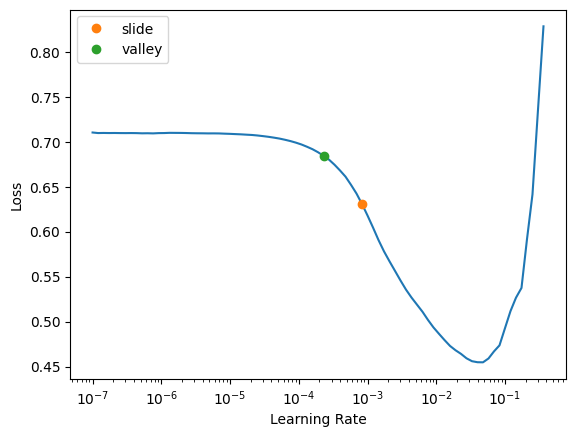

In [36]:
learner.lr_find(suggest_funcs=[slide, valley])

In [37]:
learner.fit_one_cycle(2,4.75e-4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.100507,0.098480,0.958964,00:39
1,0.089138,0.091517,0.960637,00:35


In [38]:
learner.save("Question-classifier-stage-0")

Path('models/Question-classifier-stage-0.pth')

# Stage - 1

In [ ]:
# learner.load("book-classifier-stage-0")

In [39]:
learner.unfreeze()

SuggestedLRs(slide=0.0020892962347716093, valley=1.4454397387453355e-05)

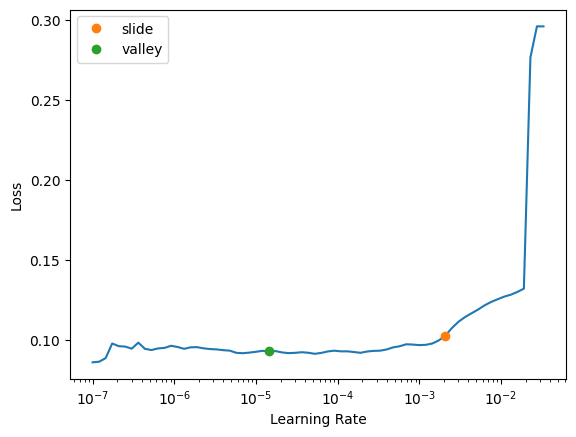

In [40]:
learner.lr_find(suggest_funcs=[slide, valley])

In [41]:
learner.fit_one_cycle(3,slice(4.75e-3, 2.25e-5))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.094125,0.095471,0.956935,01:18
1,0.073992,0.082824,0.963653,01:01
2,0.048622,0.080881,0.966628,01:02


In [42]:
learner.save("Question-classifier-stage-1")

Path('models/Question-classifier-stage-1.pth')

In [43]:
learner.export("models/Question-classifier-stage-1.pkl")